In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Collecting

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/Data/GlobalWeatherRepository.csv')
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.00,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.00,103.0,1.100,0.200,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.10,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.60,97.3,0.900,0.100,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.70,12.2,65.100,13.400,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.20,64.4,1.600,0.200,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.00,19.0,72.700,31.500,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55537,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1740564000,2025-02-26 06:00,25.1,77.2,Clear,3.4,5.4,155,SSE,1011.0,29.85,0.00,0.00,79,0,27.1,80.8,10.0,6.0,0.0,7.0,11.3,656.75,79.0,10.730,4.070,17.390,23.125,2,2,06:43 AM,06:37 PM,05:36 AM,05:33 PM,Waning Crescent,5
55538,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1740564000,2025-02-26 17:00,17.2,63.0,Overcast,2.9,4.7,91,E,1020.0,30.12,0.00,0.00,77,100,17.2,63.0,10.0,6.0,0.1,4.0,6.5,2284.75,44.0,37.000,57.350,97.865,98.605,4,10,06:19 AM,06:00 PM,05:00 AM,04:17 PM,Waning Crescent,7
55539,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1740564000,2025-02-26 13:00,23.2,73.8,Sunny,7.2,11.5,193,SSW,1015.0,29.98,0.00,0.00,14,0,22.7,72.9,10.0,6.0,11.7,8.2,13.2,327.45,95.0,0.370,3.330,27.380,91.020,2,3,06:22 AM,06:10 PM,05:04 AM,04:43 PM,Waning Crescent,6
55540,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1740564000,2025-02-26 12:00,24.4,75.8,Light rain shower,6.7,10.8,298,WNW,1011.0,29.85,0.76,0.03,75,71,26.1,79.0,10.0,6.0,13.3,8.3,13.4,414.40,58.0,0.925,1.295,9.435,10.915,1,1,06:07 AM,06:32 PM,04:20 AM,05:33 PM,Waning Crescent,6


In [8]:
df_asia = df[df["timezone"].str.contains("Asia", na=False)]

# EDA

In [9]:
df_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650 entries, 0 to 55539
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  wind_d

In [10]:
df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22096\129879787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])


In [11]:
df_asia.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,13650.000000,13650.000000,1.365000e+04,13650,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,26.294177,77.737101,1.728267e+09,2024-10-07 07:45:06.065934080,23.956989,75.124176,7.677934,12.359495,194.665495,1011.667473,29.874630,0.160040,0.006145,53.945128,33.177802,25.244293,77.433304,9.292432,5.487766,3.531158,11.094938,17.857465,953.769368,74.863048,29.615221,28.260789,40.922215,86.989501,2.205641,3.911868,49.448132
min,-8.560000,33.366700,1.715849e+09,2024-05-16 11:45:00,-24.900000,-12.800000,2.200000,3.600000,1.000000,984.000000,29.060000,0.000000,0.000000,3.000000,0.000000,-35.600000,-32.100000,0.000000,0.000000,0.000000,2.200000,3.600000,116.000000,0.000000,0.000000,0.000000,0.500000,-1848.150000,1.000000,1.000000,0.000000
25%,16.783300,47.960000,1.722171e+09,2024-07-28 19:18:45,18.800000,65.800000,3.800000,6.100000,102.000000,1007.000000,29.730000,0.000000,0.000000,33.000000,0.000000,18.800000,65.800000,10.000000,6.000000,1.000000,6.200000,9.900000,281.200000,40.100000,3.425000,2.960000,11.800000,18.700000,1.000000,1.000000,15.000000
50%,29.366700,73.170000,1.728294e+09,2024-10-07 16:45:00,26.400000,79.600000,6.500000,10.400000,202.000000,1010.000000,29.830000,0.000000,0.000000,56.000000,25.000000,27.900000,82.250000,10.000000,6.000000,2.200000,9.500000,15.300000,474.000000,71.000000,14.245000,13.505000,25.160000,40.300000,2.000000,3.000000,50.000000
75%,37.566400,104.916700,1.734432e+09,2024-12-17 19:07:30,30.900000,87.600000,10.500000,16.900000,290.000000,1017.000000,30.020000,0.020000,0.000000,75.000000,71.000000,33.700000,92.600000,10.000000,6.000000,7.000000,14.700000,23.700000,928.237500,102.000000,44.585000,37.200000,48.840000,82.507500,3.000000,6.000000,83.000000
max,51.181100,139.691700,1.740564e+09,2025-02-26 19:00:00,49.200000,120.600000,42.900000,69.100000,360.000000,3000.000000,88.590000,27.820000,1.100000,100.000000,100.000000,51.200000,124.200000,16.000000,9.000000,12.600000,59.800000,96.300000,38879.398000,480.700000,427.700000,486.180000,874.900000,6037.290000,6.000000,10.000000,100.000000
std,14.459617,30.512448,7.166239e+06,NaN,10.887545,19.597728,4.937598,7.942805,105.396145,18.804986,0.555137,0.622252,0.024558,25.324128,33.507911,12.849629,23.127467,1.778909,1.192586,3.201397,6.693224,10.772224,1698.941623,48.630234,36.928345,40.247870,54.372275,268.741634,1.172679,3.163146,34.862719


In [12]:
# df_asia.to_csv('asia_df.csv', index=False)

In [13]:
df_asia['country'].value_counts()

country
Indonesia                           573
Iran                                570
Thailand                            569
Vietnam                             522
Armenia                             286
Japan                               286
Iraq                                286
Jordan                              286
Myanmar                             286
Bahrain                             286
Uzbekistan                          286
Malaysia                            286
United Arab Emirates                286
Oman                                286
Singapore                           286
Kuwait                              286
Afghanistan                         286
Bhutan                              285
Azerbaijan                          285
Syria                               285
South Korea                         285
Israel                              285
Kazakhstan                          285
Cambodia                            285
China                           

In [14]:
df_asia['country'] = df_asia['country'].replace('Inde', 'India')
df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
df_asia['country'] = df_asia['country'].replace('Südkorea', 'South Korea')
df_asia['country'] = df_asia['country'].replace('Turkménistan', 'Turkmenistan')
df_asia['country'] = df_asia['country'].replace('Saudi Arabien', 'Saudi Arabia')
df_asia['country'] = df_asia['country'].replace('Malásia', 'Malaysia')

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22096\3920227049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Inde', 'India')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22096\3920227049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22096\3920227049.py:3: SettingWithCopyWarning: 
A value is trying to 

## Bisnis Question

### 1 Bagaimana tren suhu rata-rata bulanan di Asia?

In [15]:
monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({
    'temperature_celsius' : 'mean'
}).reset_index()

monthly_trend.index = monthly_trend['last_updated'].dt.strftime('%B')
monthly_trend.drop(columns=['last_updated'], inplace=True)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_trend.index = pd.Categorical(monthly_trend.index, categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_index()
monthly_trend

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22096\2785597916.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({


,temperature_celsius
January,15.801614
February,16.310817
May,26.660100
June,30.003696
July,30.748759
August,30.356452
September,28.793329
October,25.050437
November,20.860042
December,15.926949


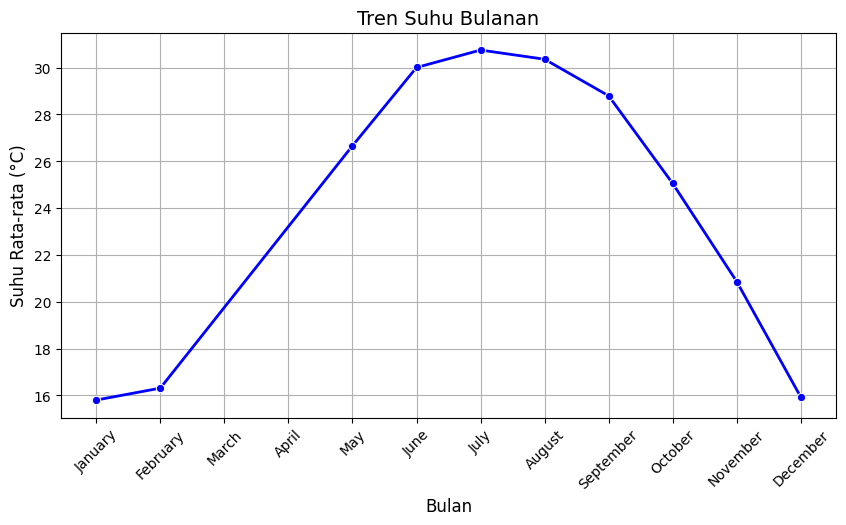

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend['temperature_celsius'], marker='o', linewidth=2, color='b')

plt.title('Tren Suhu Bulanan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Suhu Rata-rata (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. Negara mana yang memiliki kualitas udara terburuk?

In [17]:
air_quality = df.groupby('country')['air_quality_us-epa-index'].mean().sort_values(ascending=False).reset_index()
air_quality.head(10)

,country,air_quality_us-epa-index
0,China,4.154386
1,Chile,4.081272
2,Südkorea,4.000000
3,India,3.760563
4,Saudi Arabia,3.422535
5,Kuwait,3.370629
6,Malaysia,3.174825
7,Bahrain,3.174825
8,Bangladesh,3.066667
9,Pakistan,3.056140


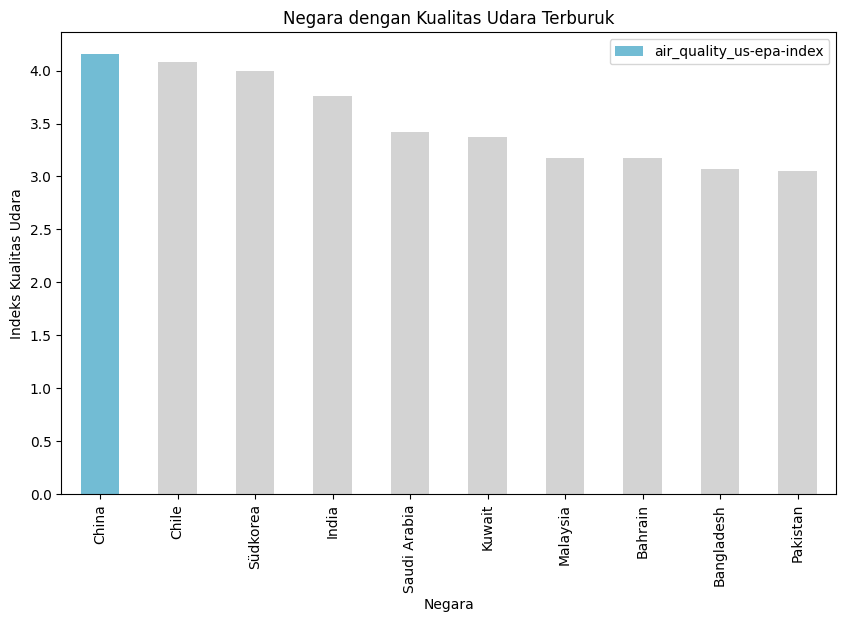

In [59]:
colors = ["#72BCD4","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3",]
air_quality.head(10).plot(kind='bar', x='country', y='air_quality_us-epa-index', figsize=(10, 6), color=colors)
plt.xlabel("Negara")
plt.ylabel("Indeks Kualitas Udara")
plt.title("Negara dengan Kualitas Udara Terburuk")
plt.show()

### 3. Cuaca apa yang sering terjadi di negara Asia?

In [19]:
weather_counts = df_asia['condition_text'].value_counts().reset_index()

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22096\550877012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_counts, x='count', y='condition_text', palette='pastel')


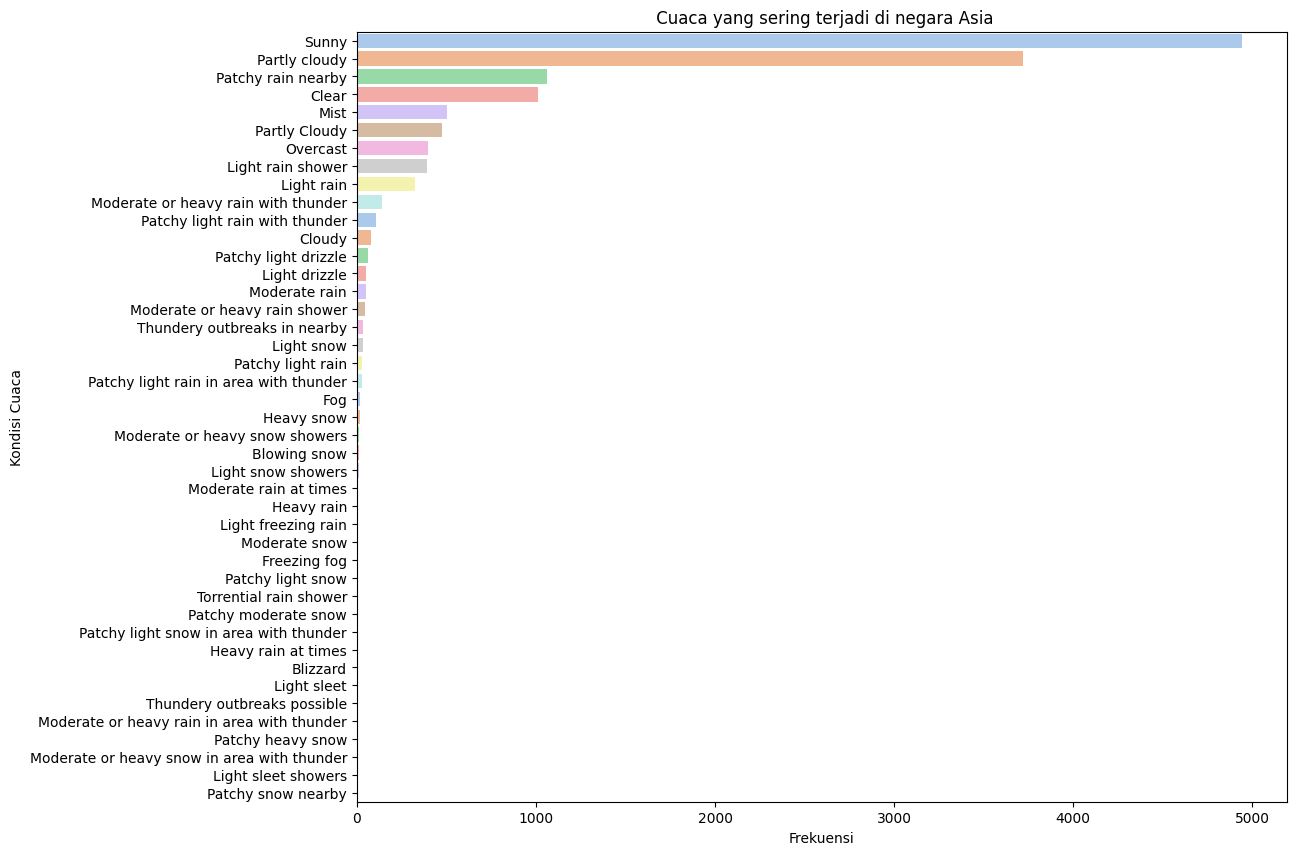

In [20]:
plt.figure(figsize=(12, 10))
sns.barplot(data=weather_counts, x='count', y='condition_text', palette='pastel')
plt.xlabel("Frekuensi")
plt.ylabel("Kondisi Cuaca")
plt.title(" Cuaca yang sering terjadi di negara Asia")
plt.show()


### 4 Negara mana yang memiliki rata rata kecepatan angin trbesar?

In [21]:
wind_speed = df_asia.groupby('country')['wind_kph'].mean().sort_values(ascending=False).reset_index()
wind_speed.head(10)

,country,wind_kph
0,Azerbaijan,23.096842
1,Bahrain,19.946503
2,Qatar,18.692982
3,Kazakhstan,17.942456
4,Jordan,17.905245
5,United Arab Emirates,17.726224
6,Israel,17.104912
7,Iraq,16.889860
8,Japan,16.496853
9,Sri Lanka,16.448772


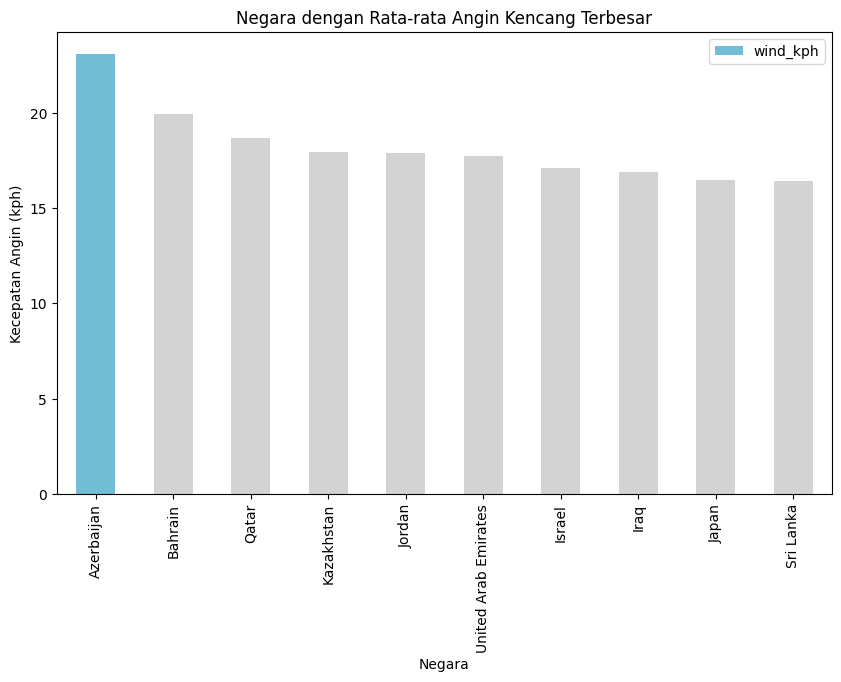

In [60]:
colors = ["#72BCD4","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3",]
wind_speed.head(10).plot(kind='bar', x='country', y='wind_kph', figsize=(10, 6), color=colors)
plt.xlabel("Negara")
plt.ylabel("Kecepatan Angin (kph)")
plt.title("Negara dengan Rata-rata Angin Kencang Terbesar")
plt.show()


### 5.  Bagaimana hubungan antara tingkat kelembapan dan suhu yang terasa di berbagai negara Asia?

In [23]:
humidity_temp = df_asia.groupby('country')[['humidity', 'temperature_celsius', 'feels_like_celsius']].mean().reset_index()
humidity_temp.columns = ['Negara', 'Rata-rata Kelembapan (%)', 'Rata-rata Suhu (°C)', 'Rata-rata Suhu Terasa (°C)']
humidity_temp

,Negara,Rata-rata Kelembapan (%),Rata-rata Suhu (°C),Rata-rata Suhu Terasa (°C)
0,Afghanistan,28.545455,18.761538,17.699650
1,Armenia,38.111888,18.808042,18.173077
2,Azerbaijan,59.445614,19.434737,18.838246
3,Bahrain,51.370629,30.201399,33.587063
4,Bangladesh,52.943860,29.565614,32.348772
5,Bhutan,73.691228,11.547368,11.025614
6,Brunei Darussalam,84.217544,27.988421,33.382456
7,Cambodia,69.985965,30.165614,33.644211
8,China,48.056140,15.905614,15.660351
9,Cyprus,45.280702,26.293684,27.236491


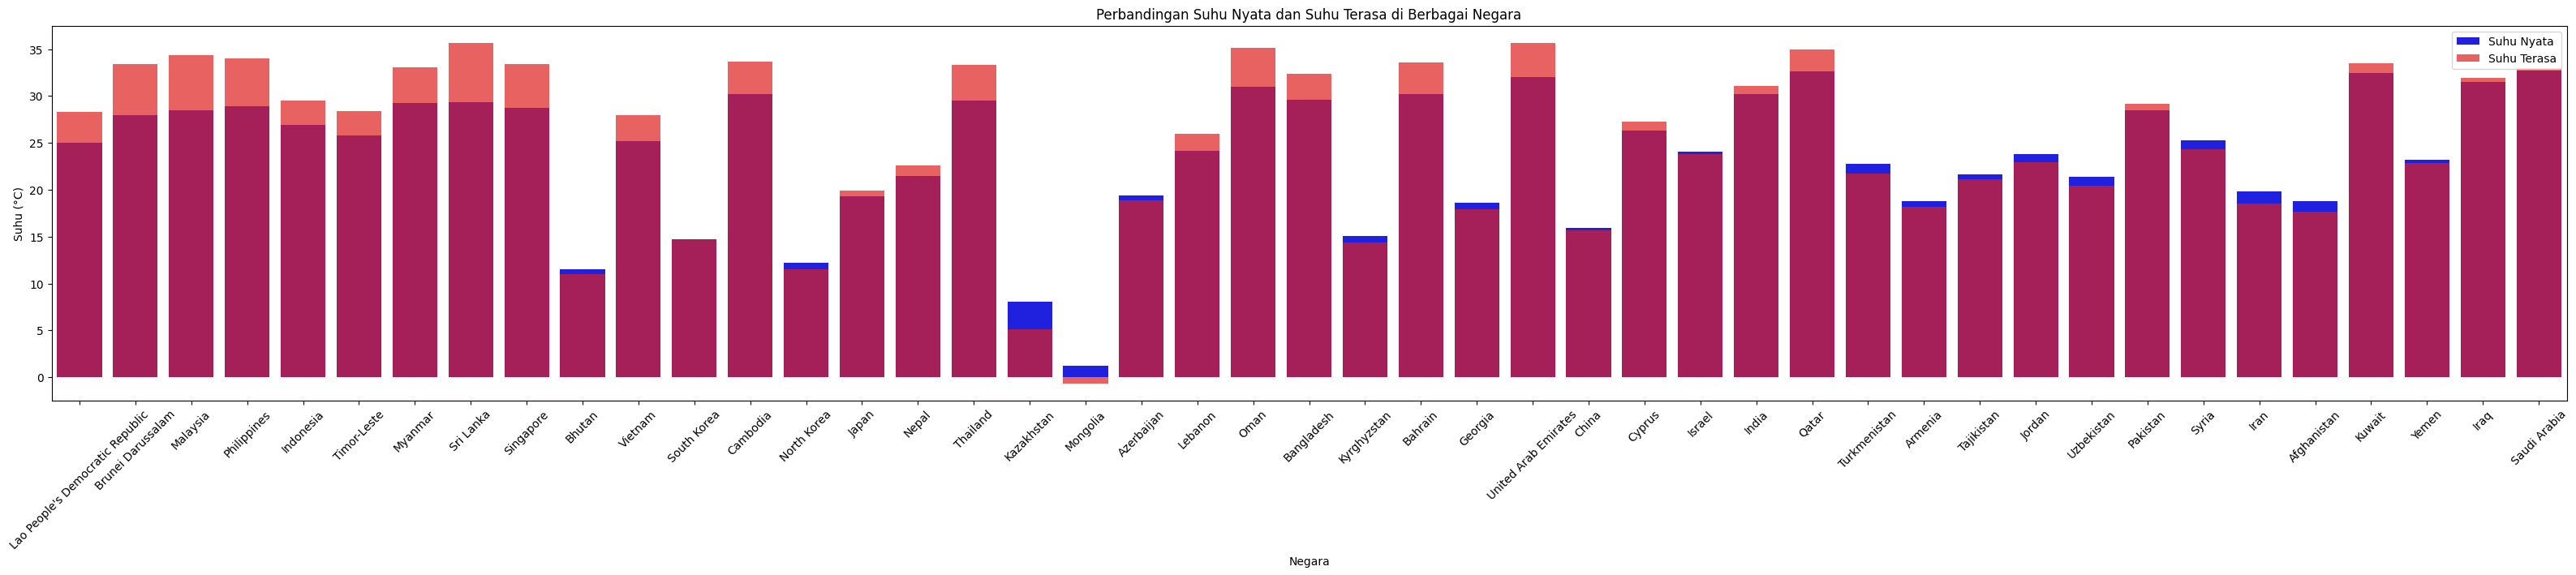

In [24]:
plt.figure(figsize=(40, 6))
sns.barplot(data=humidity_temp.sort_values('Rata-rata Kelembapan (%)', ascending=False), 
            x='Negara', y='Rata-rata Suhu (°C)', color='blue', label="Suhu Nyata")
sns.barplot(data=humidity_temp.sort_values('Rata-rata Kelembapan (%)', ascending=False), 
            x='Negara', y='Rata-rata Suhu Terasa (°C)', color='red', alpha=0.7, label="Suhu Terasa")

plt.xlabel("Negara")
plt.ylabel("Suhu (°C)")
plt.title("Perbandingan Suhu Nyata dan Suhu Terasa di Berbagai Negara")
plt.xticks(rotation=45)
plt.legend()
plt.show()


### 6.Negara mana yang memiliki curah hujan tertinggi?

In [25]:
rainfall = df.groupby('country')['precip_mm'].mean().sort_values(ascending=False).reset_index()
rainfall.head(10)

,country,precip_mm
0,Lao People's Democratic Republic,1.970000
1,Letonia,1.830000
2,Malásia,1.550000
3,Brunei Darussalam,0.580281
4,Malaysia,0.580070
5,USA United States of America,0.530000
6,Sierra Leone,0.521338
7,Sri Lanka,0.508105
8,Guyana,0.470318
9,Indonesia,0.468115


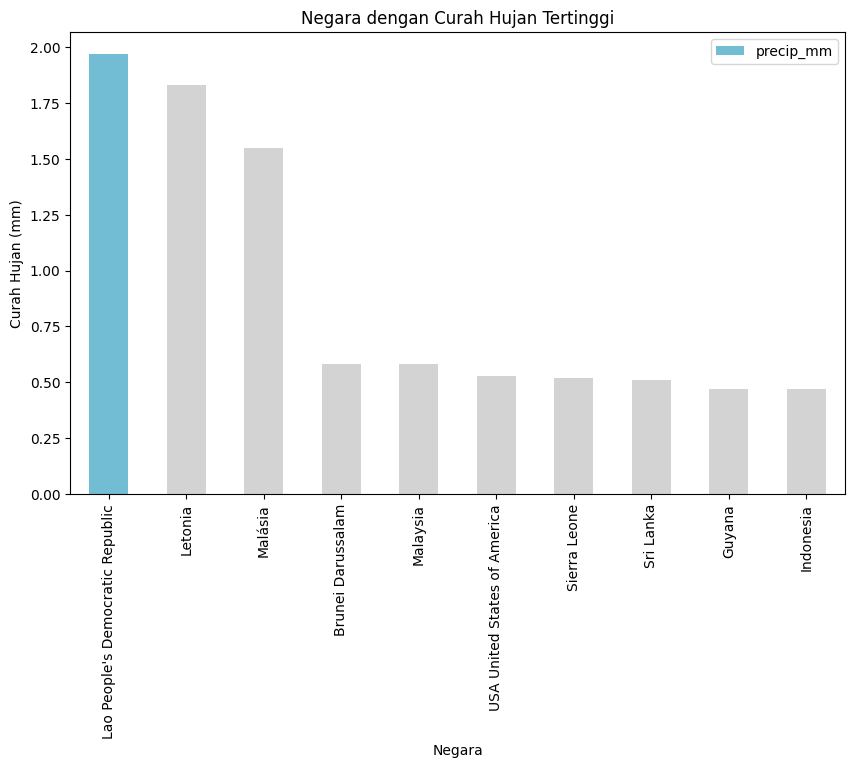

In [61]:
colors = ["#72BCD4","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3",]
rainfall.head(10).plot(kind='bar', x='country', y='precip_mm', figsize=(10, 6), color=colors)
plt.xlabel("Negara")
plt.ylabel("Curah Hujan (mm)")
plt.title("Negara dengan Curah Hujan Tertinggi")
plt.show()


### 7. Bagaimana pengaruh fase bulan terhadap suhu rata-rata?

In [27]:
df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()


,moon_phase,temperature_celsius
0,First Quarter,21.991453
1,Full Moon,21.956269
2,Last Quarter,22.045697
3,New Moon,22.645253
4,Waning Crescent,22.129017
5,Waning Gibbous,21.902251
6,Waxing Crescent,22.832917
7,Waxing Gibbous,22.743798


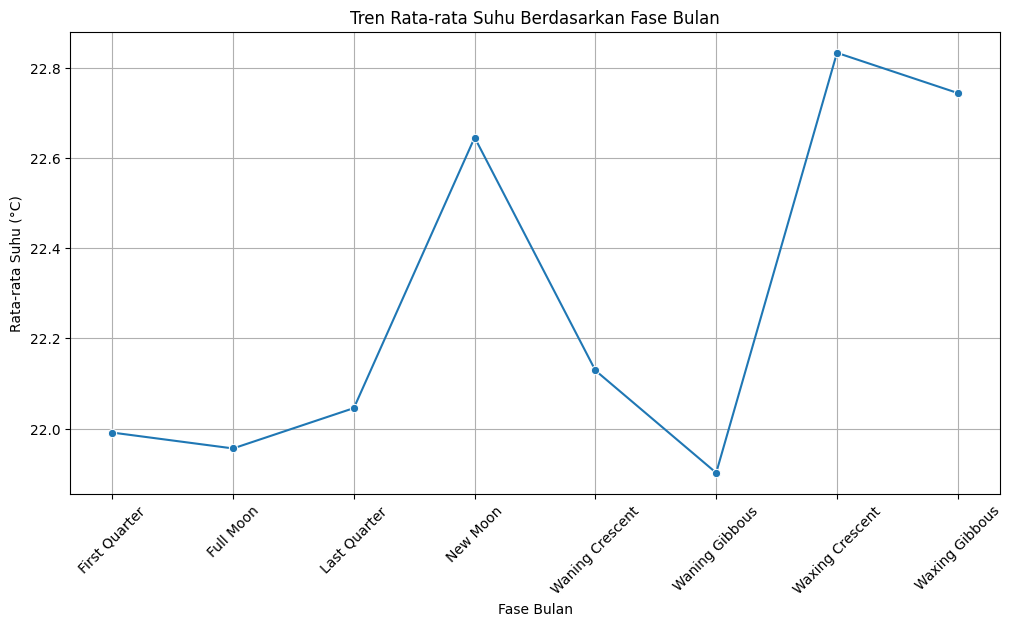

In [28]:
plt.figure(figsize=(12, 6))
avg_temp_per_moon_phase = df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()
sns.lineplot(x='moon_phase', y='temperature_celsius', data=avg_temp_per_moon_phase, marker='o', linestyle='-')
plt.xlabel("Fase Bulan")
plt.ylabel("Rata-rata Suhu (°C)")
plt.title("Tren Rata-rata Suhu Berdasarkan Fase Bulan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


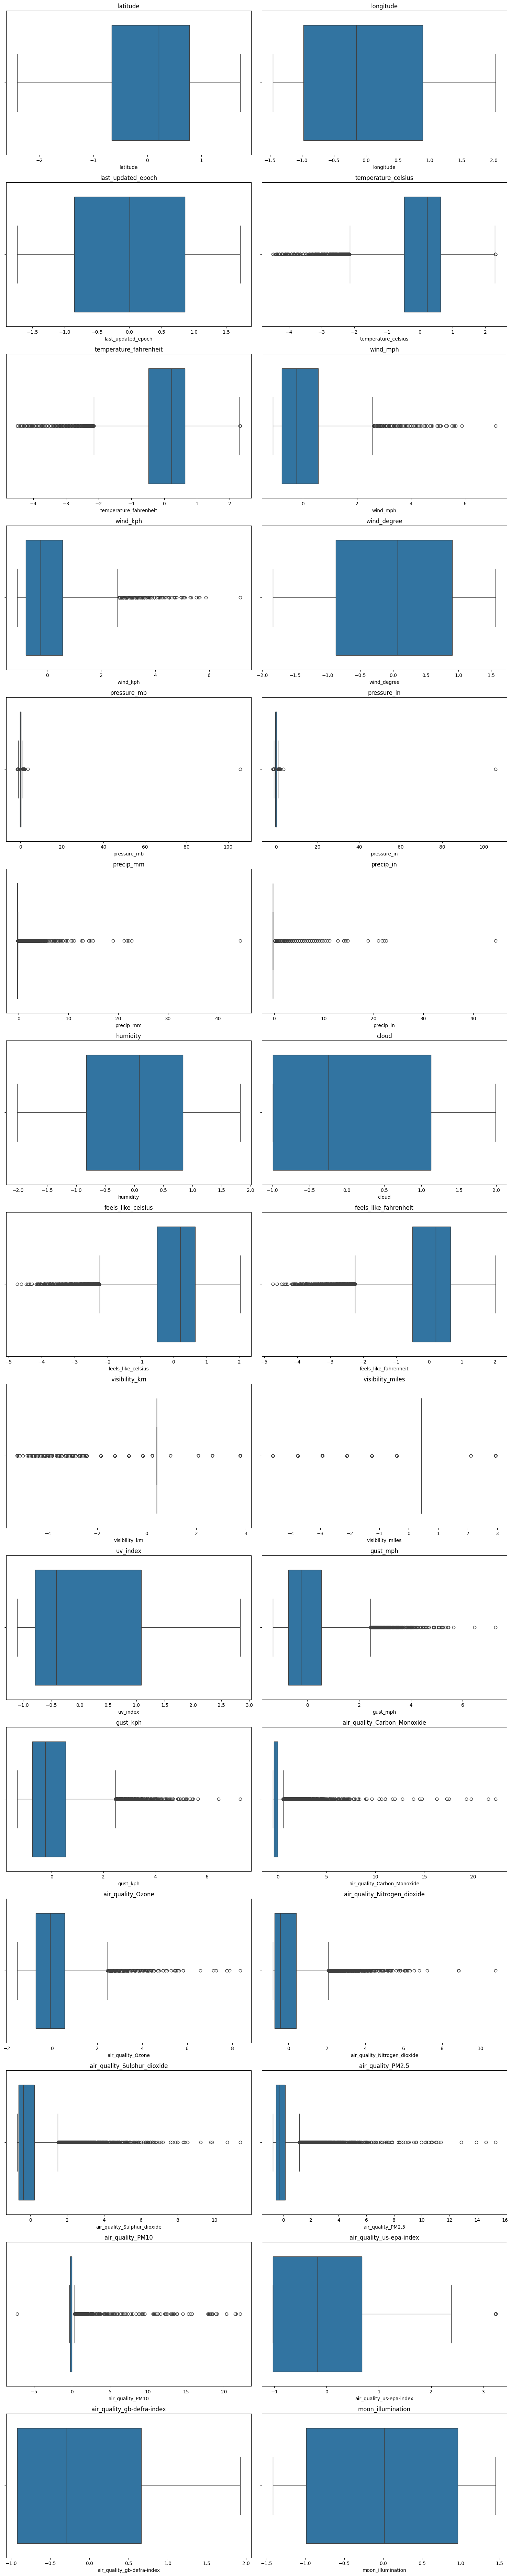

In [57]:
numeric_features = df_asia.select_dtypes(include='number').columns

total_features = len(numeric_features)
n_cols = 2
n_rows = -(-total_features // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df_asia[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [33]:
missing_values = df_asia.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [40]:
scaler = StandardScaler()
df_asia[numeric_features] = scaler.fit_transform(df_asia[numeric_features])

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_22096\742448879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia[numeric_features] = scaler.fit_transform(df_asia[numeric_features])


In [41]:
LabelEncoder = LabelEncoder()
fix_asia_lencoder = pd.DataFrame(df_asia)

category_features = df_asia.select_dtypes(include='object').columns

for col in category_features:
    fix_asia_lencoder[col] = LabelEncoder.fit_transform(df_asia[col])
    
fix_asia_lencoder

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,0,28,0.568903,-0.280457,21,-1.732959,2024-05-16 13:15:00,0.242764,0.238599,27,0.125990,0.118414,1.360009,6,0.017684,0.027688,-0.257204,-0.250237,-1.182518,-0.094841,0.004335,0.002884,0.397768,0.429531,1.083580,-0.238300,-0.237422,-0.398362,0.578611,-0.772205,-0.697225,-0.598162,-0.224720,-1.028146,-0.920594,56,163,1345,22,7,0.159255
7,1,60,0.960353,-1.089009,44,-1.732959,2024-05-16 12:45:00,-0.455307,-0.455385,28,-0.684150,-0.699967,-0.518686,9,0.283580,0.279887,-0.048277,0.156980,-0.550686,-0.244065,-0.485969,-0.485730,0.397768,0.429531,0.146455,-0.731354,-0.738729,-0.451397,0.578611,-0.774913,-0.694740,-0.737944,-0.320355,-1.028146,-0.920594,111,245,35,182,7,0.159255
10,2,6,0.975568,-0.913008,6,-1.732959,2024-05-16 12:45:00,-0.639009,-0.639086,28,-0.684150,-0.699967,-1.657289,5,0.443118,0.442015,-0.257204,-0.250237,0.555020,0.502055,-0.641621,-0.641395,0.397768,0.429531,0.458830,-0.970411,-0.970816,-0.427793,0.136483,-0.609723,-0.657470,-0.717712,-0.315517,-1.028146,-0.920594,89,224,1429,140,7,0.159255
12,3,36,-0.003747,-0.890066,5,-1.732959,2024-05-16 11:45:00,1.106168,1.106078,39,1.199426,1.213785,-0.518686,9,-0.248213,-0.242526,-0.257204,-0.250237,-0.827112,-0.990185,1.568640,1.563856,0.397768,0.429531,1.395955,1.046629,1.052981,-0.327610,0.518975,-0.301005,-0.461179,-0.035354,0.101627,-0.175367,0.027863,56,131,1341,1407,7,0.159255
13,4,18,-0.178032,0.415351,13,-1.732959,2024-05-16 14:45:00,1.326611,1.330602,27,-0.684150,-0.699967,0.259360,12,-0.301392,-0.296569,-0.257204,-0.250237,-0.906091,-0.094841,1.249553,1.252526,0.397768,0.429531,1.708330,-0.925588,-0.924399,-0.254915,2.343010,-0.566394,-0.585414,0.161445,-0.111596,0.677413,0.660168,82,147,1377,1433,7,0.159255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55527,40,3,0.806124,-0.634315,3,1.715964,2025-02-26 15:00:00,-1.428932,-1.430023,39,-1.008206,-1.014728,1.236661,7,0.336760,0.333930,-0.257204,-0.250237,-0.313749,-0.990185,-1.326491,-1.328915,0.397768,0.429531,-0.353345,-1.194526,-1.193619,-0.272838,-0.120568,0.941446,-0.224139,-0.269489,-0.183955,-0.175367,-0.288289,229,170,706,482,4,-1.217624
55531,41,0,-0.126390,-0.765958,15,1.715964,2025-02-26 14:00:00,-0.262419,-0.261477,28,1.928552,1.931442,1.056382,7,0.443118,0.442015,-0.257204,-0.250237,-0.037323,-0.244065,-0.322534,-0.321418,0.397768,0.429531,0.521305,1.569565,1.572856,-0.362132,0.825380,-0.386173,-0.444780,-0.228658,-0.161925,-0.175367,-0.288289,173,136,558,452,4,-1.246309
55535,42,52,1.038968,-0.278162,37,1.715964,2025-02-26 15:00:00,-1.814708,-1.812734,28,-0.744910,-0.737738,1.397963,6,0.815374,0.820314,-0.257204,-0.250237,0.436551,1.248175,-1.762317,-1.756993,-1.288720,-1.247558,-0.759433,-0.880765,-0.877981,-0.257593,0.085073,-0.496391,-0.555100,-0.647177,-0.301674,-1.028146,-0.920594,188,123,636,377,4,-1.217624
55538,43,22,-0.363846,0.921392,7,1.715964,2025-02-26 17:00:00,-0.620639,-0.618675,26,-0.967699,-0.964366,-0.983616,0,0.443118,0.442015,-0.257204,-0.250237,0.910425,1.994295,-0.626056,-0.624099,0.397768,0.429531,-1.071808,-1.060057,-1.054367,0.783446,-0.634671,0.199983,0.722778,1.047314,0.043223,1.530193,1.924778,145,113,480,394,4,-1.217624


### Other

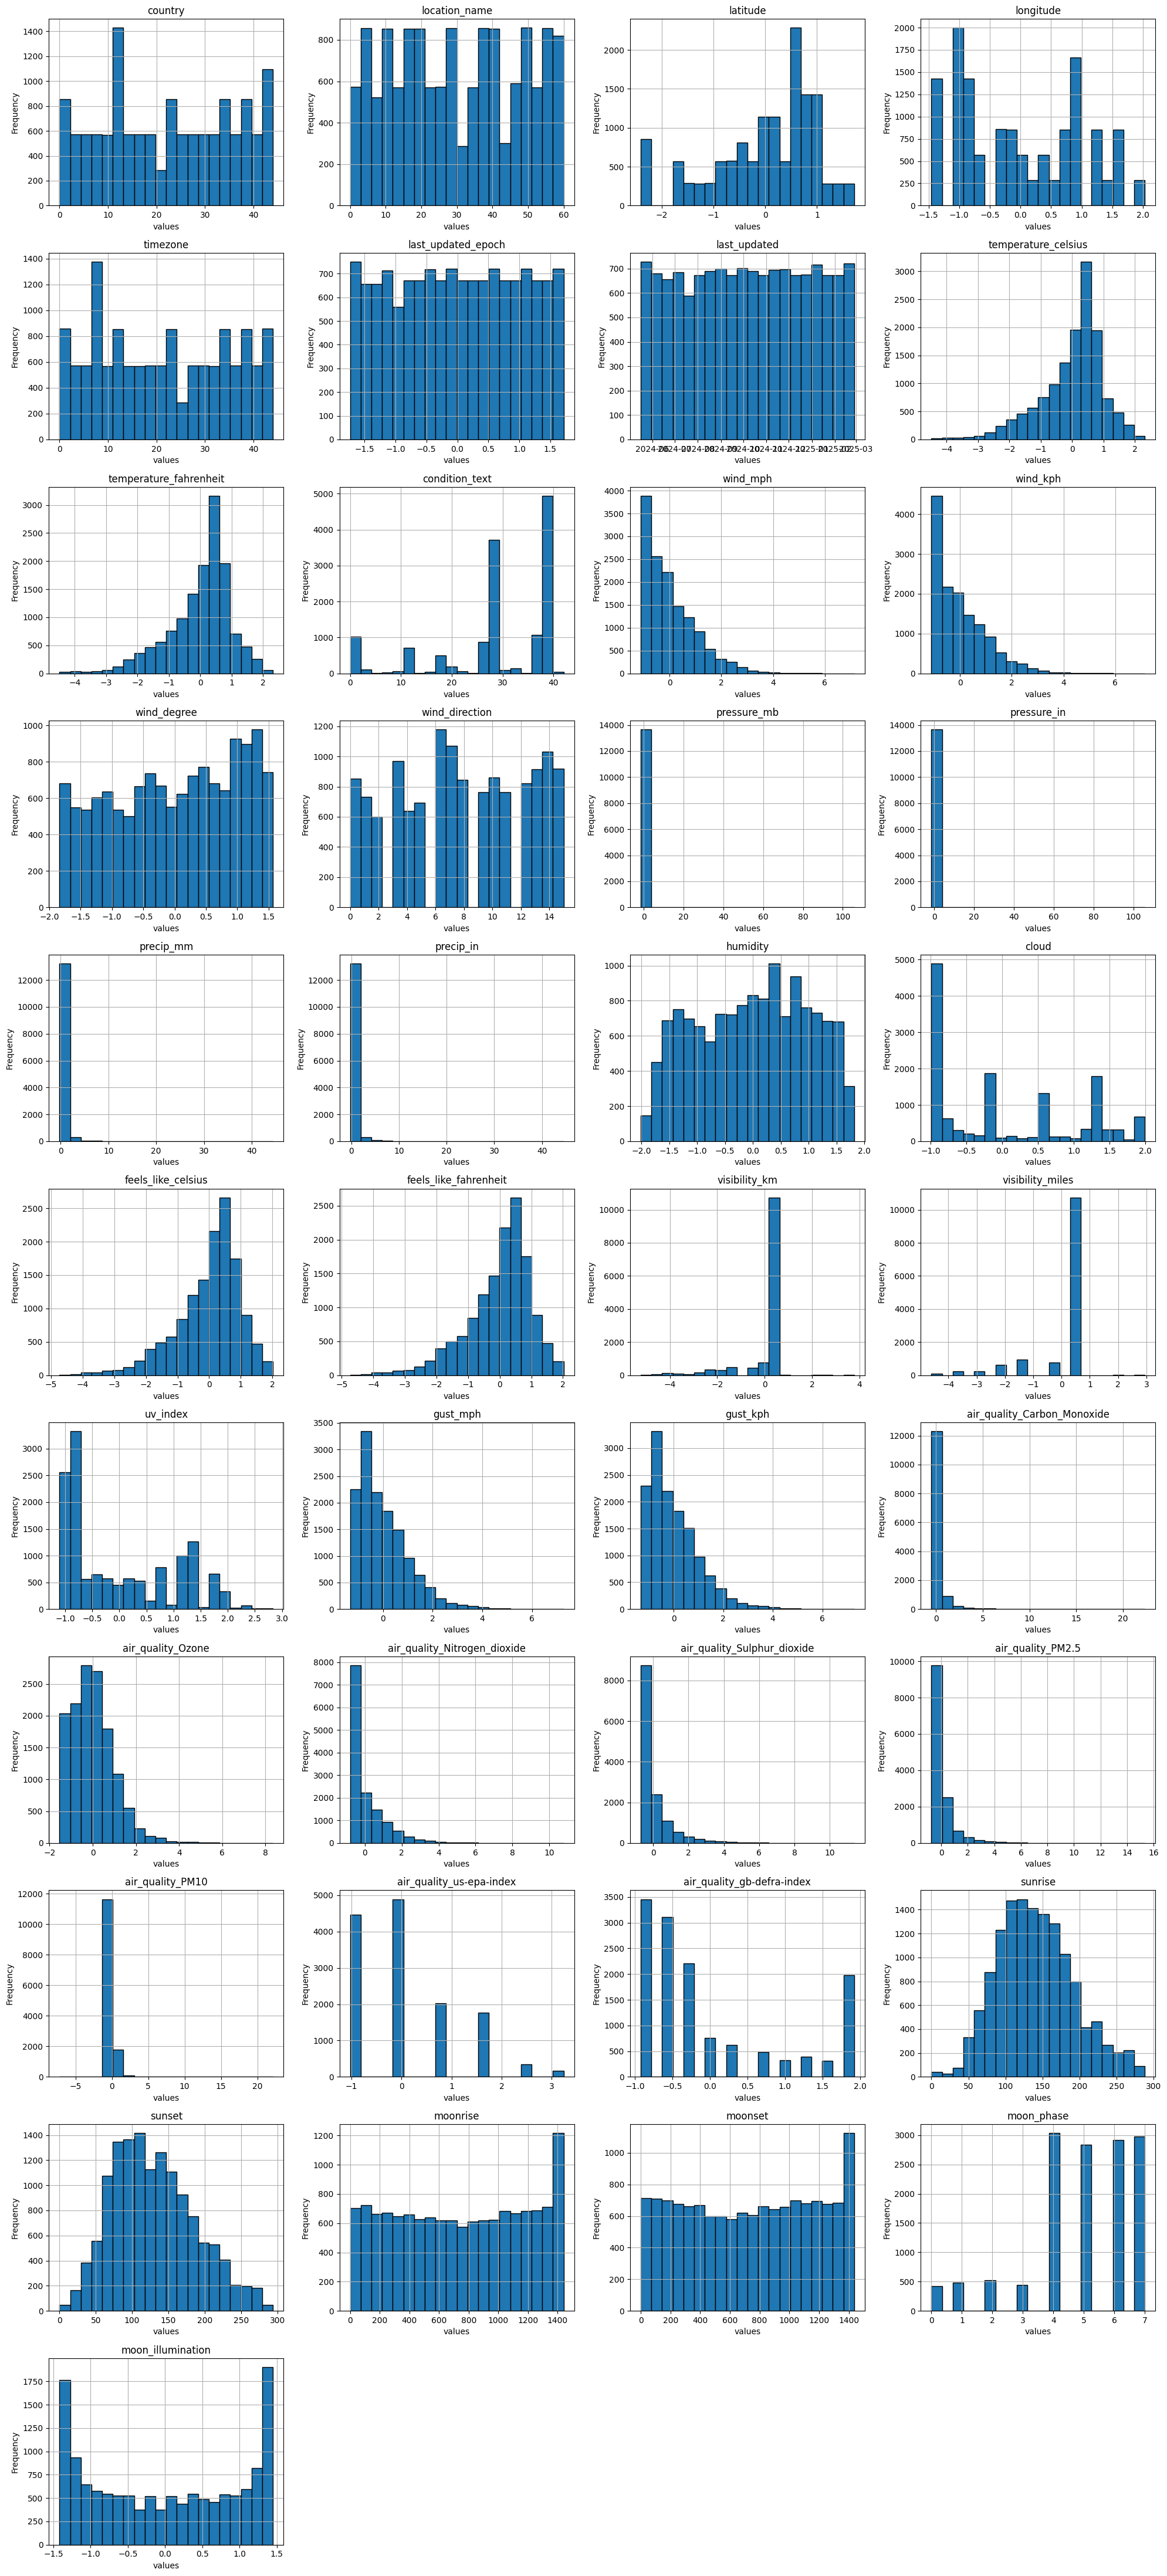

In [44]:
num_var = fix_asia_lencoder.shape[1]
n_cols = 4
n_rows = -(-num_var // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for i, column in enumerate(fix_asia_lencoder.columns):
  fix_asia_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('values')
  axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

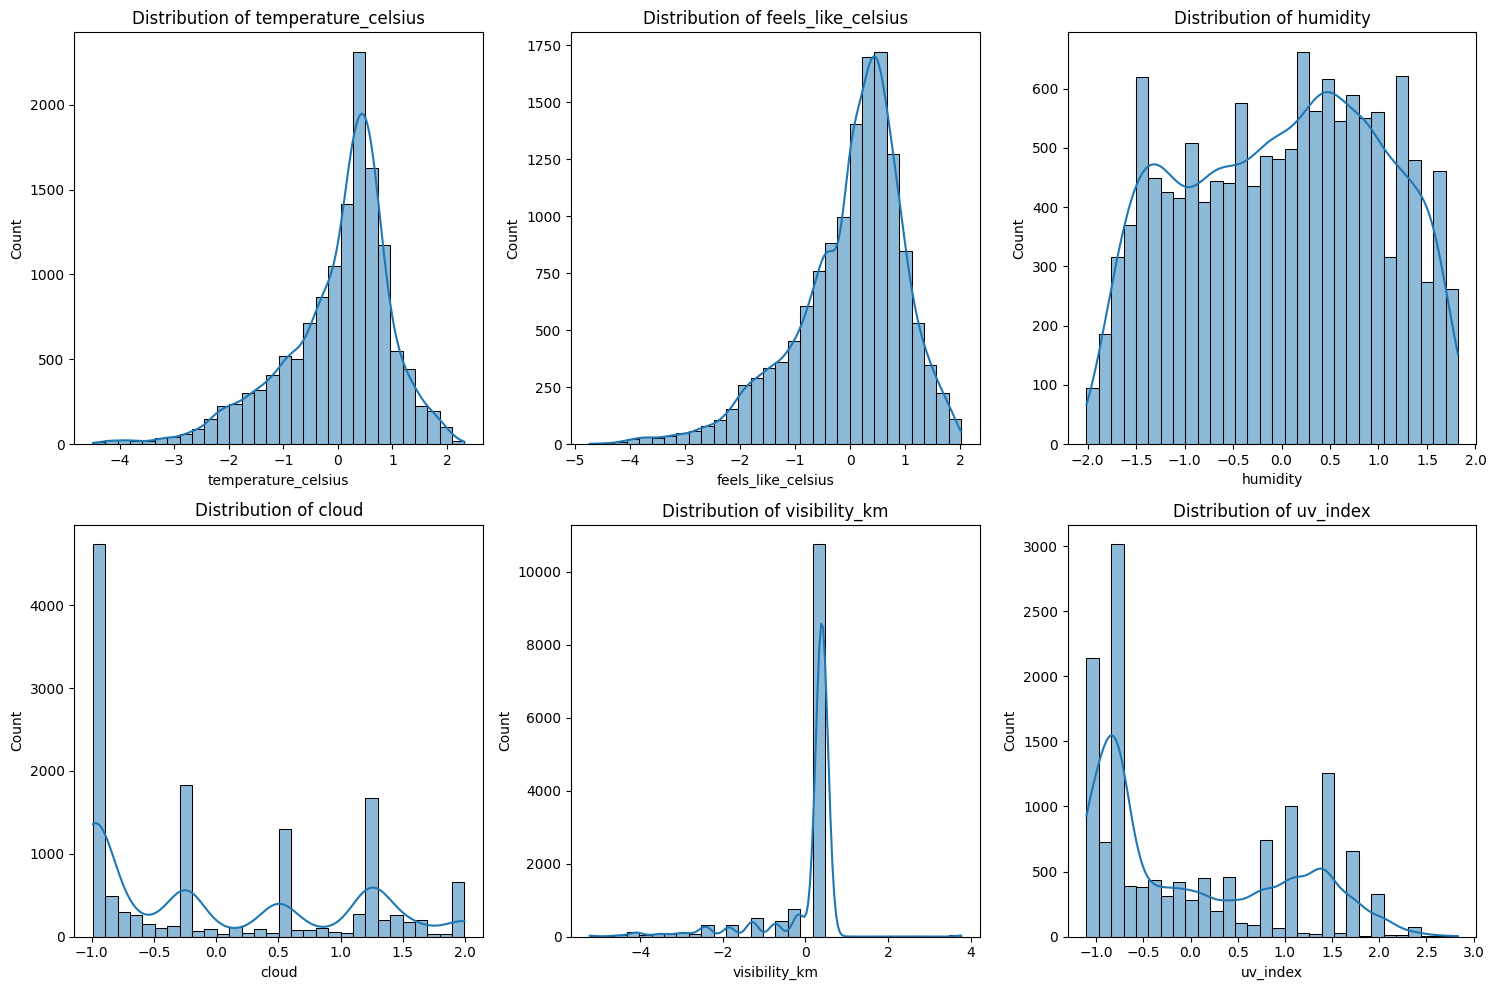

In [46]:
# Distribusi suhu dan cuaca
suhu_cuaca = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'cloud', 'visibility_km', 'uv_index']

plt.figure(figsize=(15,10))

for i, column in enumerate(suhu_cuaca, 1):
  plt.subplot(2,3,i)
  sns.histplot(fix_asia_lencoder[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

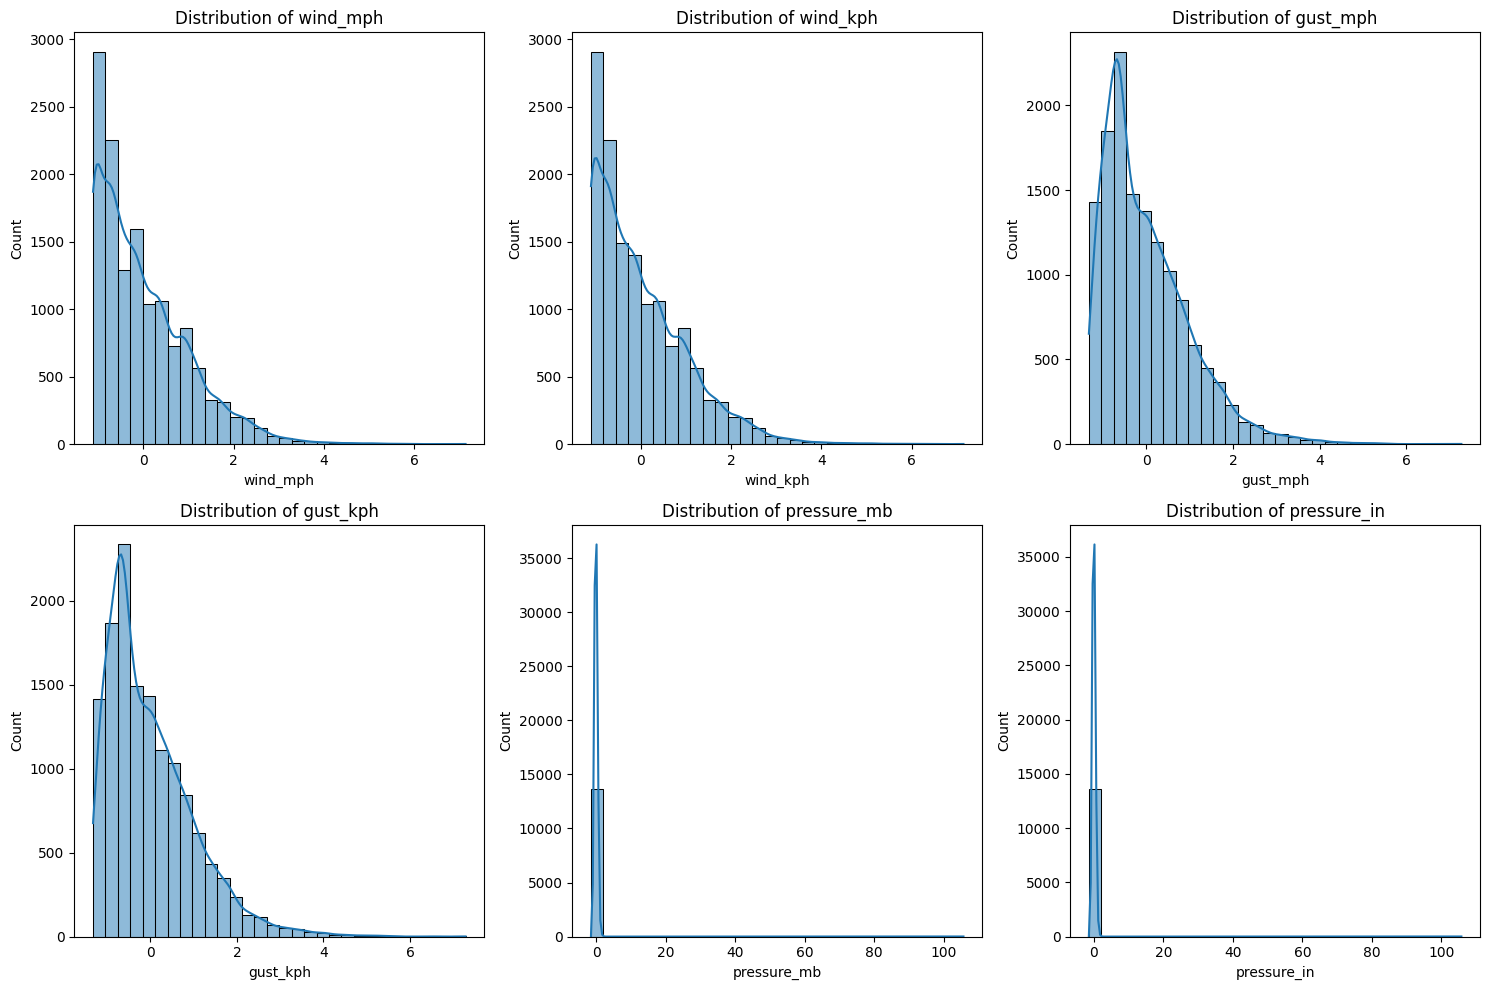

In [47]:
# Distribusi angin dan tekanan udara
angin_udara = ['wind_mph', 'wind_kph', 'gust_mph', 'gust_kph', 'pressure_mb', 'pressure_in']

plt.figure(figsize=(15,10))

for i, column in enumerate(angin_udara, 1):
  plt.subplot(2,3,i)
  sns.histplot(fix_asia_lencoder[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

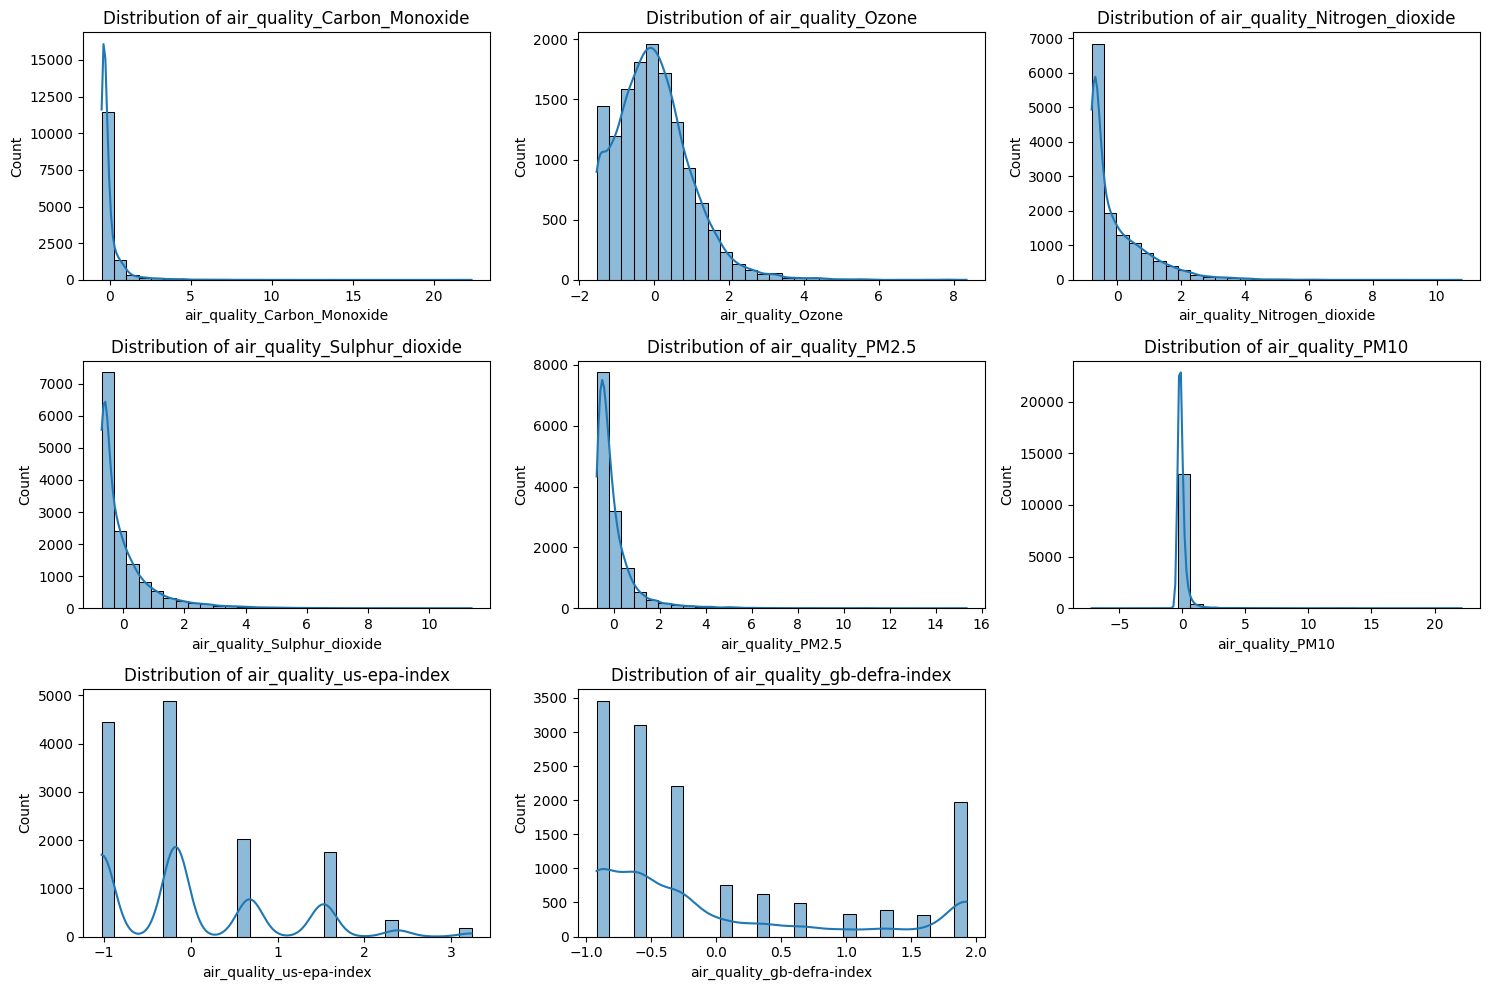

In [49]:
# Distribusi Polutan
polutan = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',  'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',  'air_quality_us-epa-index', 'air_quality_gb-defra-index']
plt.figure(figsize=(15,10))

for i, column in enumerate(polutan, 1):
  plt.subplot(3,3,i)
  sns.histplot(fix_asia_lencoder[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

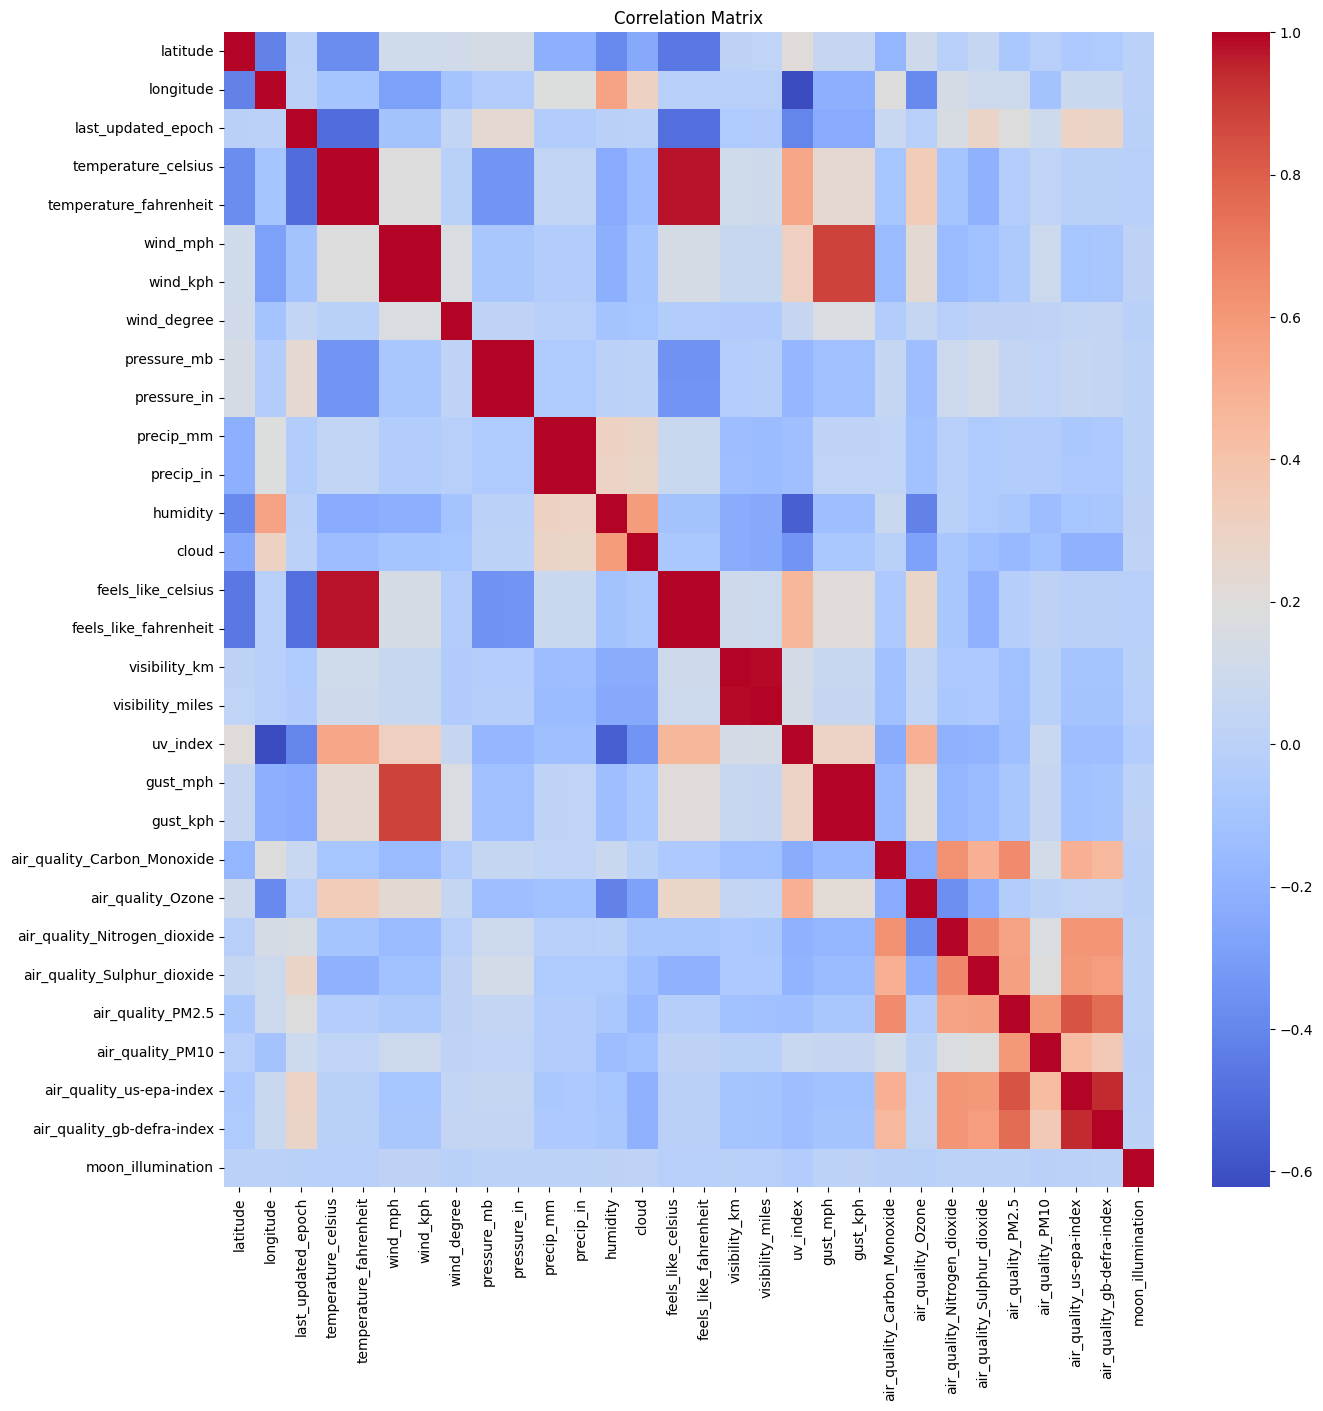

In [56]:
plt.figure(figsize=(15,15))
correlation_matrix = fix_asia_lencoder[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()